In [45]:
%pylab inline
import numpy as np
import matplotlib as plt
from scipy.fftpack import fft
import cmath as cm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [46]:
X=np.linspace(-5,5,200)
Y=exp(-X**2)
YF=fft(Y)
freq=fftfreq(X.shape[-1])

(1+10j)
(1-10j)


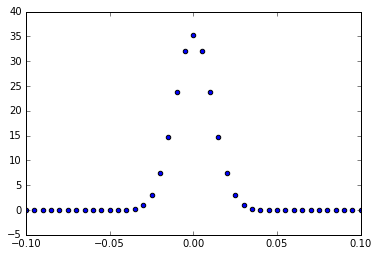

In [47]:
#plot(X,Y)
scatter(freq,abs(YF))
xlim(-.1,.1)
Z=complex(1,10)
print Z
print conjugate(Z)


In [127]:
#Definiendo algunas variables
T=200
dt=1.0/T

E=np.linspace(1.01,4,T)
t=linspace(0,100,T)
Vop=1.0
hbar=1.0
m=1
d=0.01
print pi

3.14159265359


In [159]:
omega=linspace(-0.1,0.1,T)
gamma=[5*10**-3,1*10**-3,0]
OMEGA=1
trans=zeros([len(E),3])

for g in gamma:
    sigma=sqrt(g**2+(4.0*OMEGA/pi)**2) #cambiando gamma
    
    FT=sqrt(t*sigma*exp(-(sigma-g)*t)) #definiendo la funcion sqrt(f(t))
    
    for i in range(len(E)): #variando la energia, punto por punto
        
        Vo=Vop-hbar*omega # definiendo el cambio de potencial
        
        k=sqrt(2.0*m*E[i])/hbar
        kp=sqrt(2.0*m*(E[i]-Vo))/hbar
        im=complex(0,1) #definiendo i
        
        w=-(2*im*k*kp*exp(-im*k*d)) / ( (k**2 + kp**2)*sin(kp*d) + 2*im*k*kp*cos(kp*d)  ) #creando la funcion para un cierto E
  
        W=abs(fft(w))#haciendo la transformada
        
        suma=0
        for l in range(len(t)):
            suma+=dt*FT[l]*W[l]
           
        trans[i,g]=suma
  
        
#freq=fftfreq(E.shape[-1])

/Users/daniellozano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in sqrt
/Users/daniellozano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[[        nan  0.          0.        ]
 [        nan  0.          0.        ]
 [        nan  0.          0.        ]
 [        nan  0.          0.        ]
 [        nan  0.          0.        ]
 [        nan  0.          0.        ]
 [ 0.00030016  0.          0.        ]
 [ 0.00029813  0.          0.        ]
 [ 0.00029614  0.          0.        ]
 [ 0.0002942   0.          0.        ]
 [ 0.00029228  0.          0.        ]
 [ 0.00029041  0.          0.        ]
 [ 0.00028857  0.          0.        ]
 [ 0.00028677  0.          0.        ]
 [ 0.00028499  0.          0.        ]
 [ 0.00028326  0.          0.        ]
 [ 0.00028155  0.          0.        ]
 [ 0.00027987  0.          0.        ]
 [ 0.00027822  0.          0.        ]
 [ 0.00027661  0.          0.        ]
 [ 0.00027502  0.          0.        ]
 [ 0.00027345  0.          0.        ]
 [ 0.00027192  0.          0.        ]
 [ 0.0002704   0.          0.        ]
 [ 0.00026892  0.          0.        ]
 [ 0.00026746  0.        

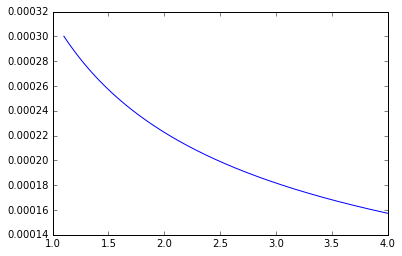

In [160]:
plot(E,trans[:,0])
print trans

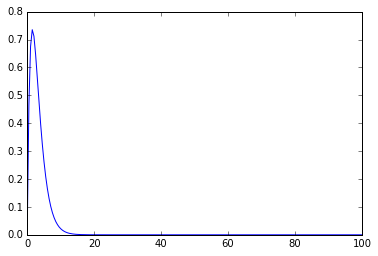

In [156]:

g=gamma[2]
sigma=sqrt(g**2+(4.0*OMEGA/pi)**2) #cambiando gamma    
FT=t*sigma*sqrt(exp(-(sigma-g)*t)) #definiendo la funcion sqrt(f(t))

plot(t,FT)    